In [46]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
import torch.nn as nn
from scipy.stats import iqr
from scipy.stats import skew
from scipy.stats import kurtosis
from IPython.display import display, HTML

In [25]:
#specify path of the dataset folder
# path = "/Users/user/Desktop/ML/Machine Learning /Project/data"
path = "data"


In [26]:
train_msAcc = np.load(path+"/train_MSAccelerometer_READ_THROW_OUT.npy")
train_msGyro = np.load(path+"/train_MSGyroscope_READ_THROW_OUT.npy")
train_labels = np.load(path+"/train_labels_READ_THROW_OUT.npy")

test_msAcc = np.load(path+"/test_MSAccelerometer_READ_THROW_OUT.npy")
test_msGyro = np.load(path+"/test_MSGyroscope_READ_THROW_OUT.npy")
test_labels = np.load(path+"/test_labels_READ_THROW_OUT.npy")

In [27]:
#print the shapes of all data arrays
print("train_msAcc shap:",train_msAcc.shape)
print("train_msGyro shap:",train_msGyro.shape)
print("train_labels shap:",train_labels.shape)


print("test_msAcc shap:",test_msAcc.shape)
print("test_msGyro shap:",test_msGyro.shape)
print("test_labels shap:",test_labels.shape)

train_msAcc shap: (87, 268, 3)
train_msGyro shap: (87, 268, 3)
train_labels shap: (87,)
test_msAcc shap: (90, 268, 3)
test_msGyro shap: (90, 268, 3)
test_labels shap: (90,)


In [28]:

#set number of train examples and test examples according to the shape of train and test data
trainingExamples = 87
testExamples = 90 

train_features = np.zeros((train_msAcc.shape[0],16,3))
test_features = np.zeros((test_msAcc.shape[0],16,3))

print("train_features shape :",train_features.shape)
print("test_features shape :",test_features.shape)

train_features shape : (87, 16, 3)
test_features shape : (90, 16, 3)


In [64]:
#decide for num of features for example min, max, mean, std, etc. and create/prepare numpy arrays (for training and testing data) to store them
#Hint: size of train_features array = np.zeros((train_num_examples, num_of_sensors * num_features, 3))


# Feature extraction for training data set

# Accelerometer features (Mean, Min, Max, Std, Variance, IQR, Skewness, Kurtosis for each axis)
train_features[:, 0, :] = np.mean(train_msAcc, axis=1)       # Mean for each axis
train_features[:, 1, :] = np.min(train_msAcc, axis=1)        # Min for each axis
train_features[:, 2, :] = np.max(train_msAcc, axis=1)        # Max for each axis
train_features[:, 3, :] = np.std(train_msAcc, axis=1)        # Std for each axis
train_features[:, 4, :] = np.var(train_msAcc, axis=1)        # Variance for each axis
train_features[:, 5, :] = iqr(train_msAcc, axis=1)           # IQR for each axis
train_features[:, 6, :] = skew(train_msAcc, axis=1)          # Skewness for each axis
train_features[:, 7, :] = kurtosis(train_msAcc, axis=1)      # Kurtosis for each axis

# Gyroscope features (Mean, Min, Max, Std, Variance, IQR, Skewness, Kurtosis for each axis)
train_features[:, 8, :]  = np.mean(train_msGyro, axis=1)     # Mean for each axis
train_features[:, 9, :]  = np.min(train_msGyro, axis=1)      # Min for each axis
train_features[:, 10, :] = np.max(train_msGyro, axis=1)      # Max for each axis
train_features[:, 11, :] = np.std(train_msGyro, axis=1)      # Std for each axis
train_features[:, 12, :] = np.var(train_msGyro, axis=1)      # Variance for each axis
train_features[:, 13, :] = iqr(train_msGyro, axis=1)         # IQR for each axis
train_features[:, 14, :] = skew(train_msGyro, axis=1)        # Skewness for each axis
train_features[:, 15, :] = kurtosis(train_msGyro, axis=1)    # Kurtosis for each axis

# Feature extraction for testing data set (same as training data)

# Accelerometer features (Mean, Min, Max, Std, Variance, IQR, Skewness, Kurtosis for each axis)
test_features[:, 0, :] = np.mean(test_msAcc, axis=1)         # Mean for each axis
test_features[:, 1, :] = np.min(test_msAcc, axis=1)          # Min for each axis
test_features[:, 2, :] = np.max(test_msAcc, axis=1)          # Max for each axis
test_features[:, 3, :] = np.std(test_msAcc, axis=1)          # Std for each axis
test_features[:, 4, :] = np.var(test_msAcc, axis=1)          # Variance for each axis
test_features[:, 5, :] = iqr(test_msAcc, axis=1)             # IQR for each axis
test_features[:, 6, :] = skew(test_msAcc, axis=1)            # Skewness for each axis
test_features[:, 7, :] = kurtosis(test_msAcc, axis=1)        # Kurtosis for each axis

# Gyroscope features (Mean, Min, Max, Std, Variance, IQR, Skewness, Kurtosis for each axis)
test_features[:, 8, :]  = np.mean(test_msGyro, axis=1)       # Mean for each axis
test_features[:, 9, :]  = np.min(test_msGyro, axis=1)        # Min for each axis
test_features[:, 10, :] = np.max(test_msGyro, axis=1)        # Max for each axis
test_features[:, 11, :] = np.std(test_msGyro, axis=1)        # Std for each axis
test_features[:, 12, :] = np.var(test_msGyro, axis=1)        # Variance for each axis
test_features[:, 13, :] = iqr(test_msGyro, axis=1)           # IQR for each axis
test_features[:, 14, :] = skew(test_msGyro, axis=1)          # Skewness for each axis
test_features[:, 15, :] = kurtosis(test_msGyro, axis=1)      # Kurtosis for each axis


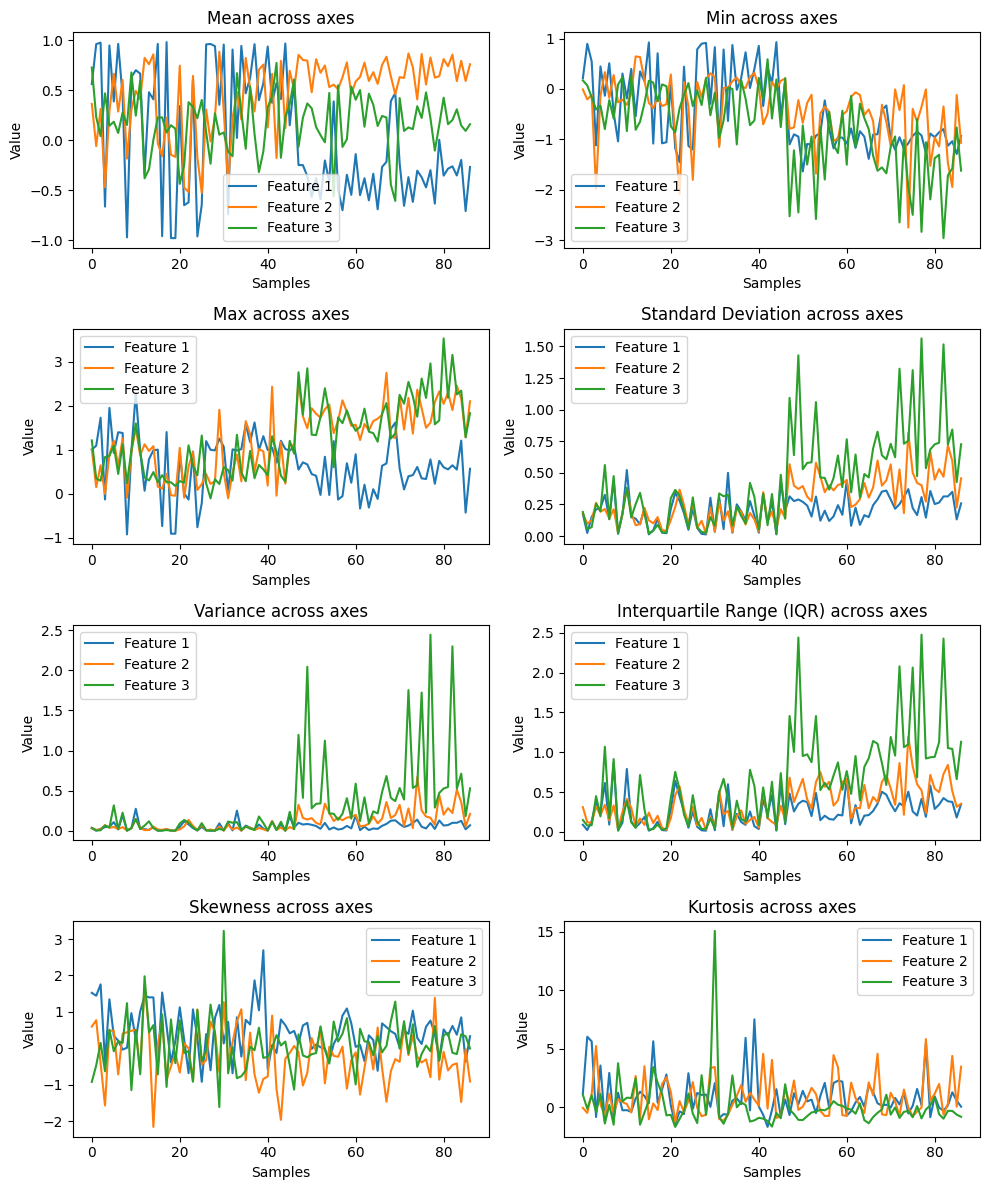

In [65]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Function to visualize the features with a heading
def plot_features(features, title, feature_names):
    # Create a figure with 8 subplots (one for each feature)
    fig, axes = plt.subplots(4, 2, figsize=(10, 12))
    axes = axes.flatten()
    
    # Display the heading
    display(HTML(f"<h1>{title}</h1>"))
    
    # Plot each feature
    for i in range(8):  # Loop through 8 features
        axes[i].plot(features[:, i, :])
        axes[i].set_title(f'{feature_names[i]}')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Value')
        axes[i].legend([f'Feature {j+1}' for j in range(features.shape[2])])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Define feature names
accelerometer_feature_names = [
    "Mean across axes", "Min across axes", "Max across axes", "Standard Deviation across axes",
    "Variance across axes", "Interquartile Range (IQR) across axes", "Skewness across axes", "Kurtosis across axes"
]

gyroscope_feature_names = [
    "Mean across axes", "Min across axes", "Max across axes", "Standard Deviation across axes",
    "Variance across axes", "Interquartile Range (IQR) across axes", "Skewness across axes", "Kurtosis across axes"
]

# Visualizing Training Data
plot_features(train_features[:, :8, :], "Accelerometer Training Features", accelerometer_feature_names)



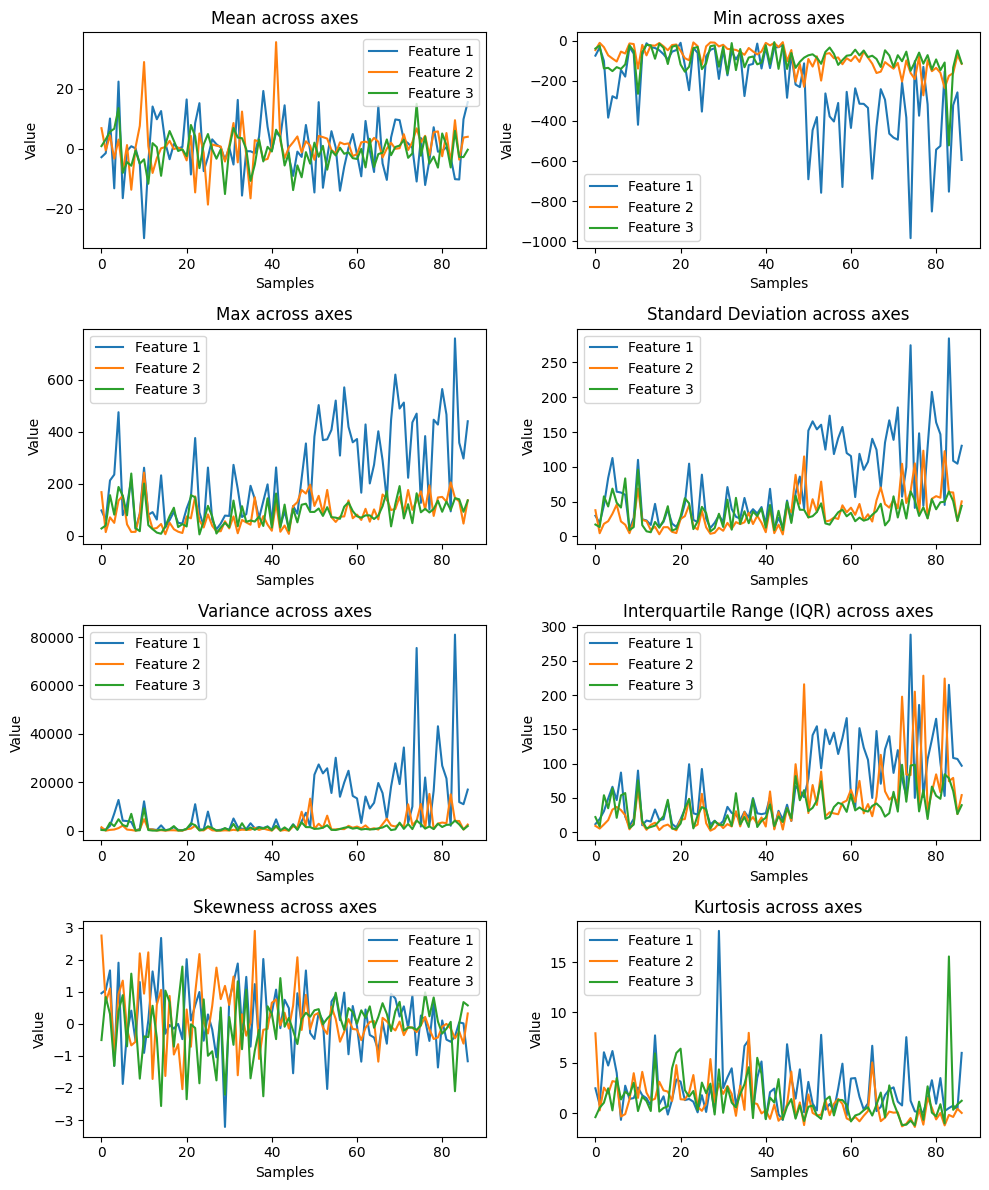

In [66]:
plot_features(train_features[:, 8:16, :], "Gyroscope Training Features", gyroscope_feature_names)

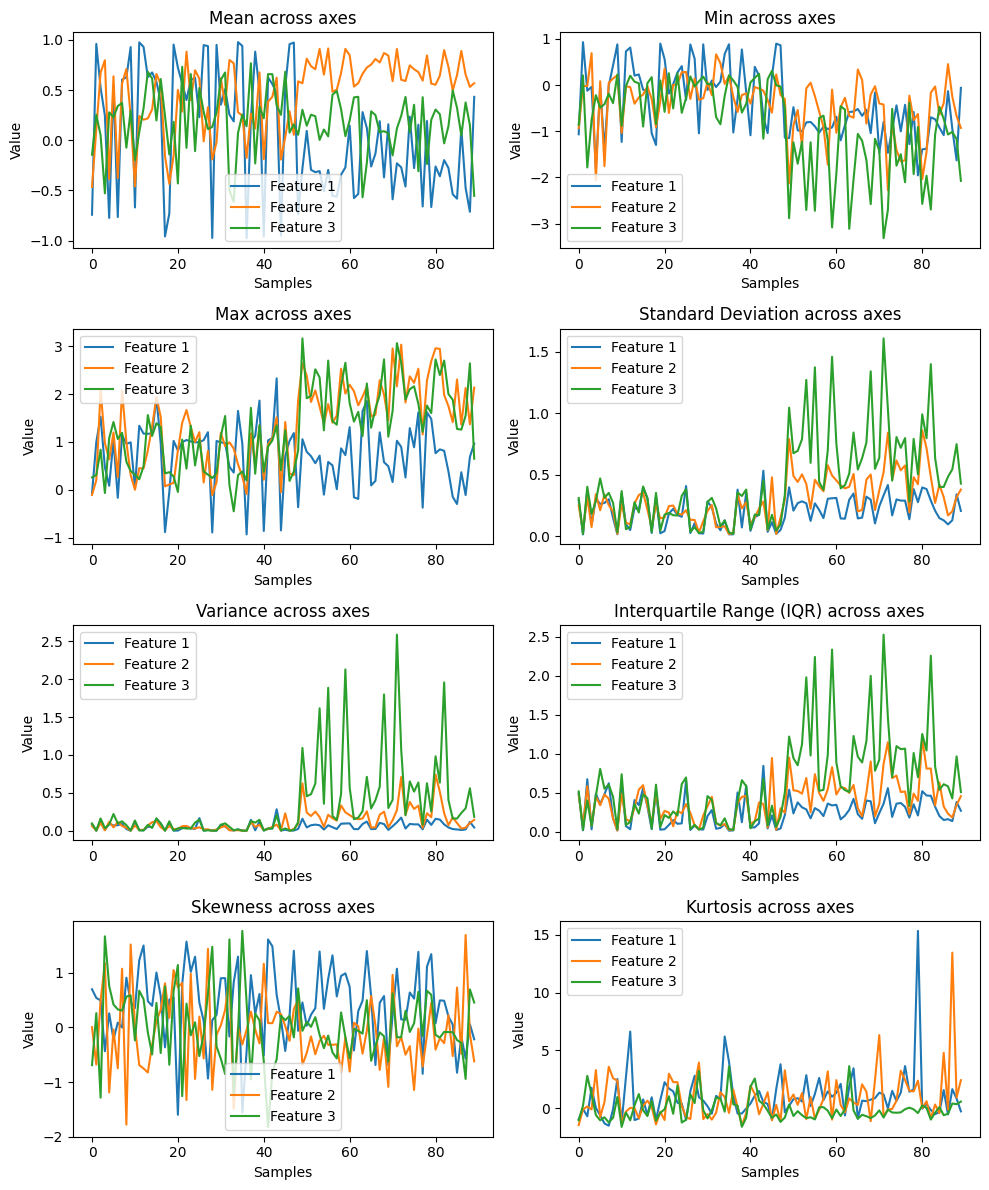

In [68]:
# Visualizing Testing Data
plot_features(test_features[:, :8, :], "Accelerometer Testing Features", accelerometer_feature_names)

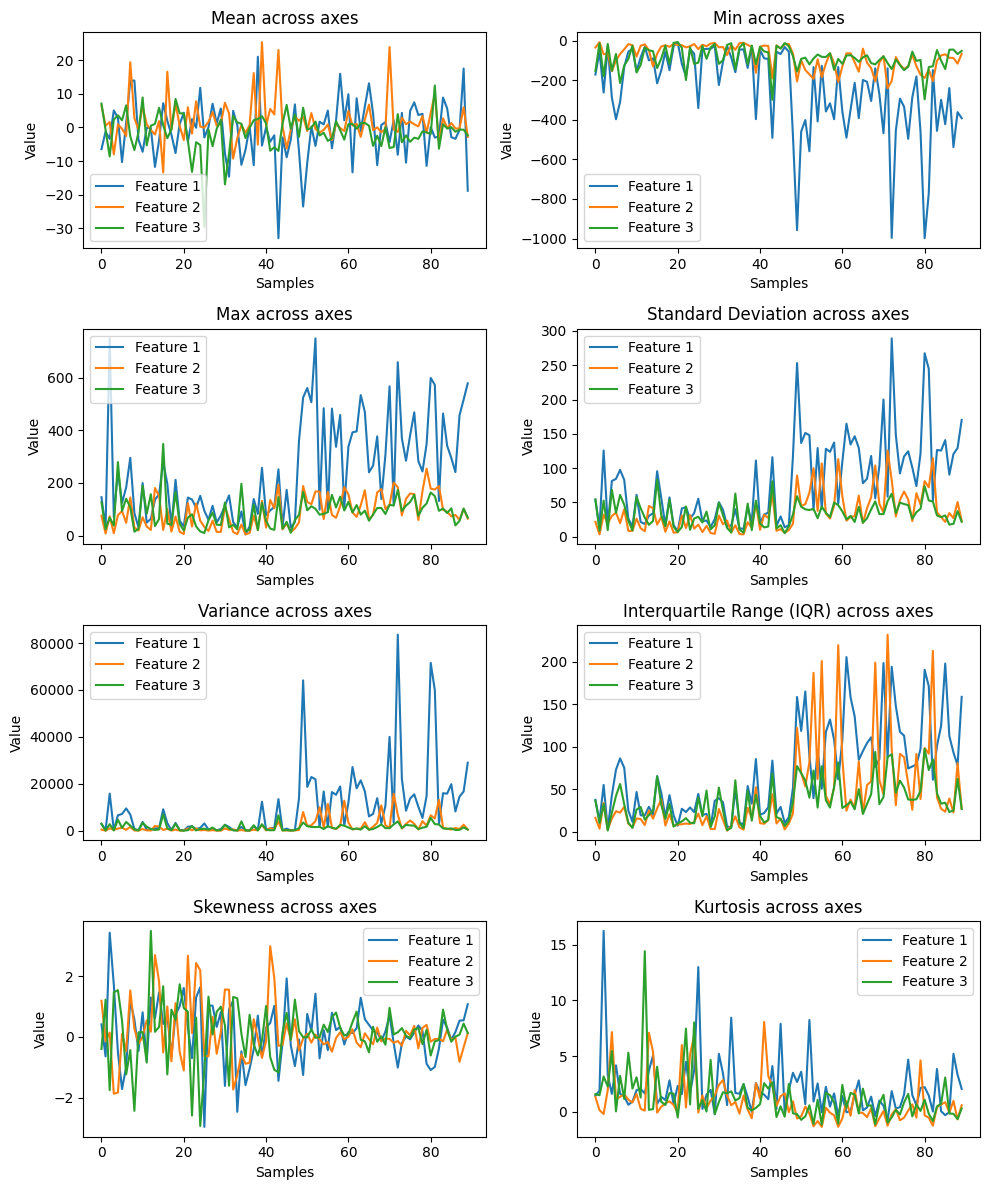

In [61]:
plot_features(test_features[:, 8:16, :], "Gyroscope Testing Features", gyroscope_feature_names)

In [36]:
#reshape and combine all features
#print(np.shape(train_features))
#train_features_reshaped = np.reshape(train_features, (np.shape(train_features)[0], np.shape(train_features)[1]*np.shape(train_features)[2] ))
#print(np.shape(train_features_reshaped))


#print(np.shape(test_features))
#test_features_reshaped = np.reshape(test_features, (np.shape(test_features)[0], np.shape(test_features)[1]*np.shape(test_features)[2] ))
#print(np.shape(test_features_reshaped))

# Reshape the training features
print("Shape of train_features before reshaping:", np.shape(train_features))
train_features_reshaped = np.reshape(train_features, (np.shape(train_features)[0], np.shape(train_features)[1] * np.shape(train_features)[2]))
print("Shape of train_features after reshaping:", np.shape(train_features_reshaped))

# Reshape the testing features
print("Shape of test_features before reshaping:", np.shape(test_features))
test_features_reshaped = np.reshape(test_features, (np.shape(test_features)[0], np.shape(test_features)[1] * np.shape(test_features)[2]))
print("Shape of test_features after reshaping:", np.shape(test_features_reshaped))

Shape of train_features before reshaping: (87, 16, 3)
Shape of train_features after reshaping: (87, 48)
Shape of test_features before reshaping: (90, 16, 3)
Shape of test_features after reshaping: (90, 48)


In [37]:
#You should use ML classification algorithms, for example SVM, logistic regression, decision trees, random forest etc,
#The following example uses SVM. You should search for the library functions for other classifiers and use them.
classfier = SVC(C=1.0, kernel='linear')  # non-linear kernel is proposed by the fernando's paper
classfier.fit(train_features_reshaped,train_labels)
estimatedLabels = classfier.predict(test_features_reshaped)

accuracy = accuracy_score(test_labels,estimatedLabels)
weightedF1 = f1_score(test_labels,estimatedLabels,average='weighted')   #  importance to classes with more instances. Useful for imbalanced datasets.
averageF1 = f1_score(test_labels,estimatedLabels,average='macro')
allF1Scores = f1_score(test_labels,estimatedLabels,average=None)
conf_matrix = confusion_matrix(test_labels,estimatedLabels)

# Print results
print('   C = 1.0 ')
print('   Average F1-score = %.4f' % (averageF1))
print('   Test accuracy = %.2f %%' % (accuracy*100))
print('   Weighted F1-score = %.4f' % (weightedF1))
print('   All F1-scores:')
print(allF1Scores)
print('   Confusion Matrix:')
print(conf_matrix)

print('-------------------------------------------------------')



   C = 1.0 
   Average F1-score = 0.9666
   Test accuracy = 96.67 %
   Weighted F1-score = 0.9667
   All F1-scores:
[0.96842105 0.96470588]
   Confusion Matrix:
[[46  2]
 [ 1 41]]
-------------------------------------------------------


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training and evaluating: {name}")
    
    # Train the classifier
    clf.fit(train_features_reshaped, train_labels)

    # Predict labels for the training data
    train_predictions = clf.predict(train_features_reshaped)
    train_accuracy = accuracy_score(train_labels, train_predictions)

    # Predict labels for the test data
    test_predictions = clf.predict(test_features_reshaped)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    # Calculate evaluation metrics for testing
    weightedF1 = f1_score(test_labels, test_predictions, average='weighted')
    averageF1 = f1_score(test_labels, test_predictions, average='macro')
    allF1Scores = f1_score(test_labels, test_predictions, average=None)
    conf_matrix = confusion_matrix(test_labels, test_predictions)

    # Store results for each classifier
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Weighted F1": weightedF1,
        "Average F1": averageF1,
        "All F1 Scores": allF1Scores,
        "Confusion Matrix": conf_matrix
    }

    # Print results
    print(f"   Training Accuracy: {train_accuracy * 100:.2f} %")
    print(f"   Testing Accuracy: {test_accuracy * 100:.2f} %")
    print(f"   Weighted F1-score: {weightedF1:.4f}")
    print(f"   Average F1-score: {averageF1:.4f}")
    print(f"   All F1-scores: {allF1Scores}")
    print(f"   Confusion Matrix:\n{conf_matrix}")
    print("-------------------------------------------------------")

Training and evaluating: Logistic Regression
   Training Accuracy: 100.00 %
   Testing Accuracy: 94.44 %
   Weighted F1-score: 0.9445
   Average F1-score: 0.9444
   All F1-scores: [0.94623656 0.94252874]
   Confusion Matrix:
[[44  4]
 [ 1 41]]
-------------------------------------------------------
Training and evaluating: Decision Tree
   Training Accuracy: 100.00 %
   Testing Accuracy: 91.11 %
   Weighted F1-score: 0.9112
   Average F1-score: 0.9111
   All F1-scores: [0.91304348 0.90909091]
   Confusion Matrix:
[[42  6]
 [ 2 40]]
-------------------------------------------------------
Training and evaluating: Random Forest
   Training Accuracy: 100.00 %
   Testing Accuracy: 93.33 %
   Weighted F1-score: 0.9334
   Average F1-score: 0.9332
   All F1-scores: [0.93617021 0.93023256]
   Confusion Matrix:
[[44  4]
 [ 2 40]]
-------------------------------------------------------


In [43]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.optim as optim

# Convert labels to binary
train_labels_binary = (train_labels > 0).astype(int)
test_labels_binary = (test_labels > 0).astype(int)

# Ensure the shape of train_labels_binary matches the number of samples in train_features
assert train_labels_binary.shape[0] == train_features.shape[0], \
    "The number of training samples in features and labels must match."
assert test_labels_binary.shape[0] == test_features.shape[0], \
    "The number of testing samples in features and labels must match."

# Flatten the features (e.g., from 3D to 2D)
train_features_reshaped = train_features.reshape(train_features.shape[0], -1) 
test_features_reshaped = test_features.reshape(test_features.shape[0], -1)

# Convert labels to tensors and reshape to ensure correct dimensions
train_labels_tensor = torch.from_numpy(train_labels_binary).float().view(-1, 1)
test_labels_tensor = torch.from_numpy(test_labels_binary).float().view(-1, 1)

# Neural Network architecture
# class SimpleNN(nn.Module):
#     def _init_(self):
#         super(SimpleNN, self)._init_()
#         self.fc1 = nn.Linear(48, 64)  
#         self.fc2 = nn.Linear(64, 1)   

class SimpleNN(nn.Module):
    def __init__(self):  # Corrected constructor name
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(48, 64)
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 1) 
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary output
        return x


# Create DataLoader for batching
batch_size = 100
train_data = TensorDataset(torch.from_numpy(train_features_reshaped).float(), train_labels_tensor)
test_data = TensorDataset(torch.from_numpy(test_features_reshaped).float(), test_labels_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer 0.001
learning_rate =0.001
epochs = 150
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # Evaluate on test data after each epoch
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test

    # Print epoch summary
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")

# Final evaluation
print("\nTraining Complete.")
print(f"Final Training Accuracy: {train_accuracy:.2f}%")
print(f"Final Testing Accuracy: {test_accuracy:.2f}%")

Epoch 1/150, Loss: 0.3151, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 2/150, Loss: 0.3151, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 3/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 4/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 5/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 6/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 7/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 8/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 9/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 10/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 11/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 12/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 13/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 14/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 15/150, Loss: 0.3150, Train Acc: 100.00%, Test Acc: 100.00%
Epoch 16/150, Loss:

In [ ]:
#For this assignment you should Create a neural network for binary classification.

#The following information is just for example
# batchSize = 50
# learningRate = 0.5 , you may also test 1, 0.5, 0.1, 0.01 and provide comparison
# epochs = 150
# targetDataProportion = 1

# msbandModel = {
#     'name': 'CNN',
#     'nb_conv_blocks' : 3,
#     'nb_conv_kernels' : [10,10,10],
#     'conv_kernels_size' : [(9,),(11,),(11,)],
#     'pooling_size' : [(2,),(2,),(2,)],
#     'activation' : 'relu',
#     }
# linear or dense layer Size = [2000,2000,2000]... but its too much. Go for smaller number of nodes.
# denseActivation = 'relu'



# trainingMSAcc = torch.from_numpy(train_msAcc)
# trainingMSGyro = torch.from_numpy(train_msGyro)
# trainingLabels = torch.from_numpy(train_labels)

# testingMSAcc = torch.from_numpy(test_msAcc)
# testingMSGyro = torch.from_numpy(test_msGyro)
# testingLabels = torch.from_numpy(test_labels)



In [ ]:
# #feaure extraction (mean, max, min, std)
# m = np.mean(train_msAcc, axis=1)
# print(np.mean(train_msAcc[0,:,0]))
# print(np.mean(train_msAcc[0,:,1]))
# print(np.mean(train_msAcc[0,:,2]))
# print(m[0])
# print(m[1])
# print(m.shape)
# m = m.flatten()
# print(m.shape)
# print(m[0])
# print(m[1])
# print(m[2])
# print(m[3])